### Importar packages utilizados

In [66]:
import numpy as np

In [67]:
import matplotlib.pyplot as plt

In [68]:
from IPython.display import clear_output

In [69]:
import networkx as nx

In [70]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

### Acesso a API do Spotify

In [71]:
client_id = "d3d57c82072447ea80c43989365dc7d1"
client_secret = "a4572a3186504dcf9bee6c8817a7c1e3"

credmanager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credmanager)

### Alguns features da API do Spotify

In [72]:
birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'

results = sp.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Young Heart
Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


### Procurando Taylor Swift

In [73]:
sp.search('Taylor Swift', type='artist')['artists']['items']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
  'followers': {'href': None, 'total': 62105261},
  'genres': ['pop'],
  'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
  'id': '06HL4z0CvFAxyc27GXpf02',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab6761610000e5eb5a00969a4698c3132a15fbb0',
    'width': 640},
   {'height': 320,
    'url': 'https://i.scdn.co/image/ab676161000051745a00969a4698c3132a15fbb0',
    'width': 320},
   {'height': 160,
    'url': 'https://i.scdn.co/image/ab6761610000f1785a00969a4698c3132a15fbb0',
    'width': 160}],
  'name': 'Taylor Swift',
  'popularity': 100,
  'type': 'artist',
  'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5WiLThuSBwqF7SMRrzQbG6'},
  'followers': {'href': None, 'total': 404},
  'genres': [],
  'href': 'https://api.spotify.com/v1/artists/5WiLThuSBwqF7SMRrzQbG6',
  'id': '5WiLThuSBwqF7SMRrzQbG6'

In [91]:
taylor_search = sp.search('Taylor Swift', type='artist')['artists']['items'][0]
taylor_search

{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
 'followers': {'href': None, 'total': 62105261},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
 'id': '06HL4z0CvFAxyc27GXpf02',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb5a00969a4698c3132a15fbb0',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051745a00969a4698c3132a15fbb0',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1785a00969a4698c3132a15fbb0',
   'width': 160}],
 'name': 'Taylor Swift',
 'popularity': 100,
 'type': 'artist',
 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}

Função para mostrar as principais características de um artista como um dictionary

In [75]:
def artist_features(spotify_search_result):
    result = {
        'artist_name': spotify_search_result.get('name', 'artist_name_not_available'),
        'artist_id': spotify_search_result.get('id', 'artist_id_not_available'),
        'artist_popularity': spotify_search_result.get('popularity', 0),
        'artist_first_genre': (spotify_search_result.get('genres', ['genre_not_available']) + ['genre_not_available'])[0],
        'artist_n_followers': spotify_search_result.get('followers', {}).get('total', 0)
    }
    return result

In [76]:
taylor_features = artist_features(taylor_search)
taylor_features

{'artist_name': 'Taylor Swift',
 'artist_id': '06HL4z0CvFAxyc27GXpf02',
 'artist_popularity': 100,
 'artist_first_genre': 'pop',
 'artist_n_followers': 62105261}

### Artistas Relacionados

In [92]:
taylors_related_artists = sp.artist_related_artists(taylor_features['artist_id'])['artists']

print('Taylor has', len(taylors_related_artists), 'related artists. The first one is given below. \n\n')

artist_features(taylors_related_artists[0])

Taylor has 20 related artists. The first one is given below. 




{'artist_name': 'Demi Lovato',
 'artist_id': '6S2OmqARrzebs0tKUEyXyp',
 'artist_popularity': 78,
 'artist_first_genre': 'dance pop',
 'artist_n_followers': 23574742}

### Criar um grafo

In [104]:
G = nx.Graph() # create an empty graph

popularity_threshold = 60 # if an artist have a lower popularity, it won't be in our graph.

Adicionando alguns nós no grafo

In [105]:
artists_name_list = ['Taylor Swift', 'Adele', 'Beyonce', 'Michael Jackson', 'Michael Buble', 'Ed Sheeran', 'Norah Jones', 
                     'Beatles', 'Ella Fitzgerald', 'Elton John', 'Shakira', 'Lady Gaga', 'Ariana Grande', 'Stevie Wonder', 
                     'Billie Eilish', 'Dua Lipa', 'Mariah Carey', 'Jennifer Lopez']

print('There are', len(artists_name_list), 'artists in the initial list.')

There are 18 artists in the initial list.


In [106]:
for name in artists_name_list:
    search = sp.search(name, type='artist')['artists']['items'][0]
    this_artist = artist_features(search)
    
    if this_artist['artist_popularity'] >= popularity_threshold:
        G.add_node(this_artist['artist_name'], **this_artist, related_found=False)
    else:
        print(name, 'is not a popular artist, we do not add it to our graph.')

Adicionando mais arestas e nós ao grafo

In [107]:
dummy = 0

while dummy == 0:
    l = len(G) # number of nodes in the graph currently
    
    for x in list(G): # iterate each node
        if G.nodes[x]['related_found'] == False: # then we need to find its related artists
            relateds = sp.artist_related_artists(G.nodes[x]['artist_id'])['artists']
            relateds = [artist_features(r) for r in relateds]
            relateds_names = [r['artist_name'] for r in relateds]
            G.nodes[x]['related_found'] = True # it was False, but now we found its related artists
            
            for rname, rdict in zip(relateds_names, relateds):
                if rdict['artist_popularity'] >= popularity_threshold:
                    
                    if rname in G: # node already in G
                        pass # do nothing
                    
                    else:
                        G.add_node(rname, **rdict, related_found=False) # we added a new node, we don't know its relateds yet
                        clear_output(wait=True)
                        print('The graph has', len(G), 'nodes now.')
                        
                    G.add_edge(x, rname) # we add an edge between x and its related rname
                    
    if len(G) == l or len(G) > 1000: # number of nodes didn't change or graph grew too large
        dummy = 1 # break the while loop
        print('Done.')

The graph has 1007 nodes now.
Done.


### Análise e visualização

In [109]:
# connected components
n_connected = nx.number_connected_components(G)
print('The graph has', n_connected, 'connected components.')

The graph has 1 connected components.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


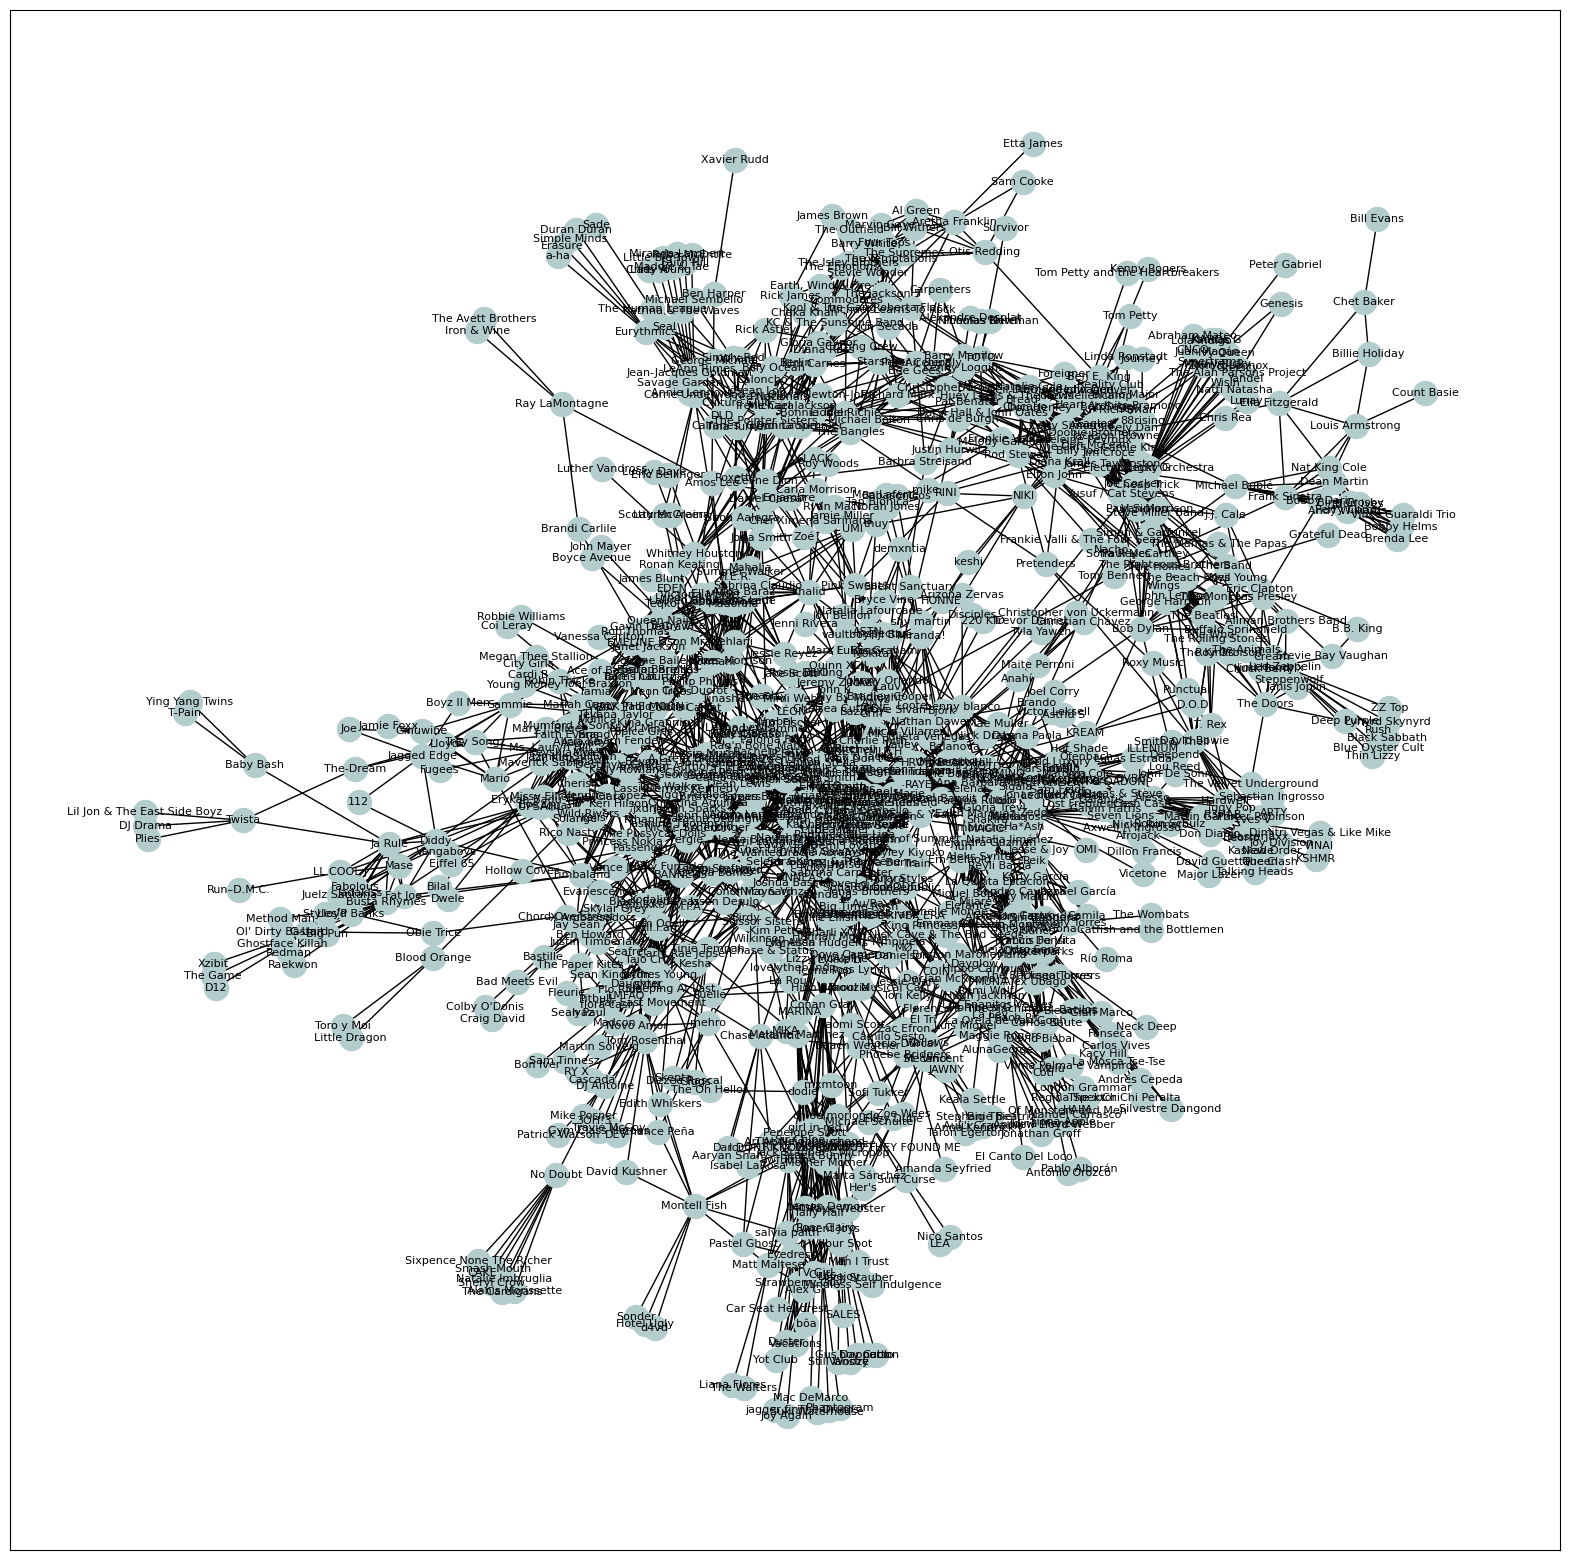

In [110]:
np.random.seed(0)
plt.figure(figsize=(20,20))
nx.draw_networkx(G, with_labels=True, node_color=(.7,.8,.8), font_size=8)